## By Rajlakshmi Gogoi, a Data Science & Business Analytics Intern at The Sparks Foundation 

# Task no. 6 of Data Science: Prediction using Decision Tree Algorithm

importing the necessary libraries:

  *   pandas: used for data manipulation and analysis.  
  *   NumPy: used for supporting large, multidimentional arrays.
  *   matplotlib: used for plotting graphs.
  *   seaborn: used for statistical data visualization.






In [ ]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

reading the given iris dataset

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


a brief summary of the dataframe, that is, column types, sum of null values, column values, shape of dataframe, and number of unique values

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [ ]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


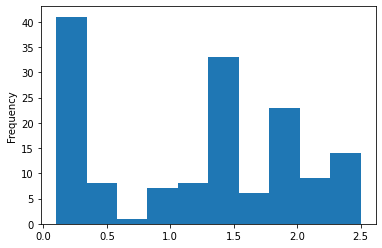

In [8]:
data['PetalWidthCm'].plot.hist()

almost 50 flowers in the dataset have a value between 0.1 and 0.5

## **Checking relationship between the Columns**

To check the relationships seaborn.seaborn is used providing a function called pairplot that plot pairwise relationships in a dataset. The whole dataframe can be sent as the parameters so that it will check relationship for each column to other columns. Categorical color based on a certain column can also been given. To know whether there are outliers in our data or not hue can be given with Species as the parameter.


In [9]:
import seaborn as sns

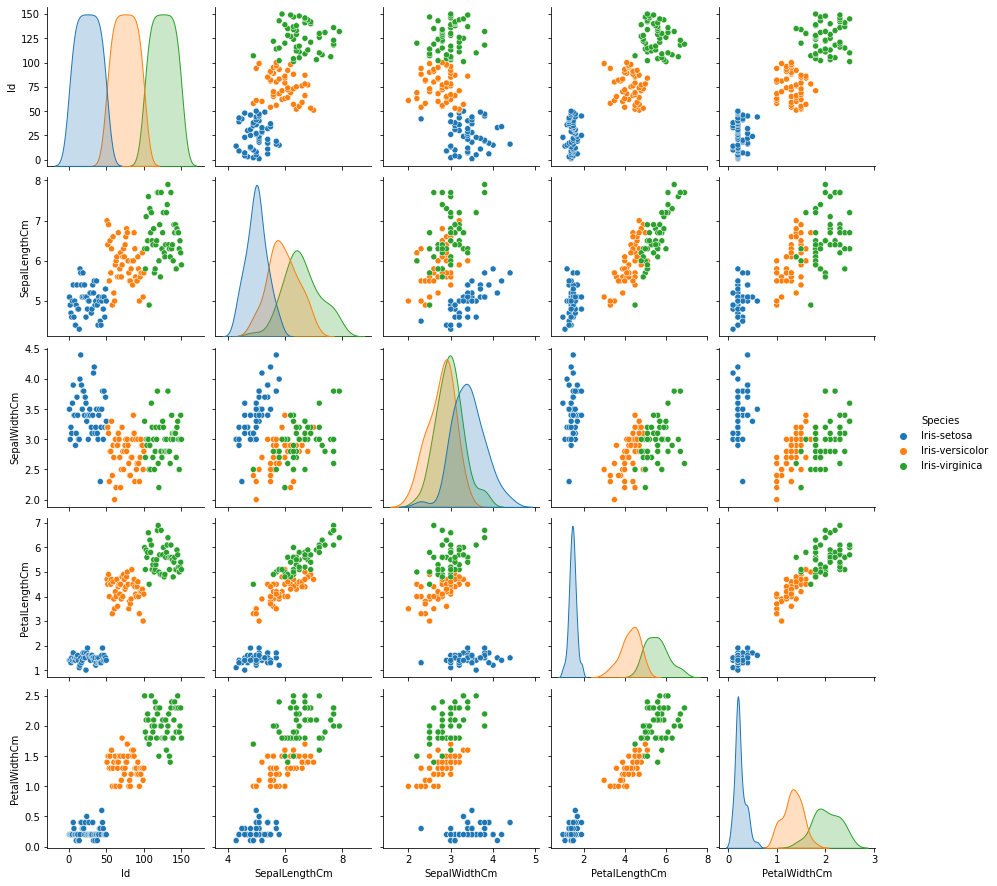

In [10]:
sns.pairplot(data, hue='Species')

The outliers present might be from wrong data or maybe it is really a data anomaly. It is assumed that it is just a data anomaly to avoid too much assumption.

**Splitting The Dataset**

Now, the dataset is splitted into two parts, one is the target variable, which is "Species" in this case, and the other is the variables on which the target variable depends.

In [11]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
Y = data['Species'].values

print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Importing required libraries

In [12]:
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import accuracy_score 

from sklearn.datasets import load_iris

from matplotlib import pyplot as plt

from sklearn import datasets

from sklearn import tree

import sklearn.metrics as metrics

Since there is only one dataset available (no separated training and test dataset) the dataset is needed to be divided into training and test dataset manually. In order to do that,the train_test_split method from the scikit-learn can be used.  

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 1)

The dataset is splitted into 70:30 for training and testing dataset. A random_state is defined equal to 1. The usage of defining random_state is to make sure the splitted dataset is the same even if we split the dataset again and again. It is actually only used to ensure that the exact same dataset can be reproduced again.

## **Classification**

In [14]:
dtc = DecisionTreeClassifier()

In [15]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
dtc.score(X_test,Y_test)

0.9555555555555556

accuracy = 95.55%

Checking if the model can predict ot not by taking random values from the dataset.

In [17]:
# prediction on random data

x=[[6.4,1.8 ,6.6 ,2.1]]

Y_pred=dtc.predict(X)

print(Y_pred)

# prediction on X_test (testing data )

Y_pred=dtc.predict(X_test)

print(Y_pred)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [18]:
#Accuray of the model 

acc = metrics.accuracy_score(Y_test, Y_pred)
print(acc)

from sklearn.metrics import  confusion_matrix

cm=np.array(confusion_matrix(Y_test,Y_pred))

cm

0.9555555555555556


array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

## **Print Text Representation**

In [19]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



## **Plotting Tree with plot_tree**

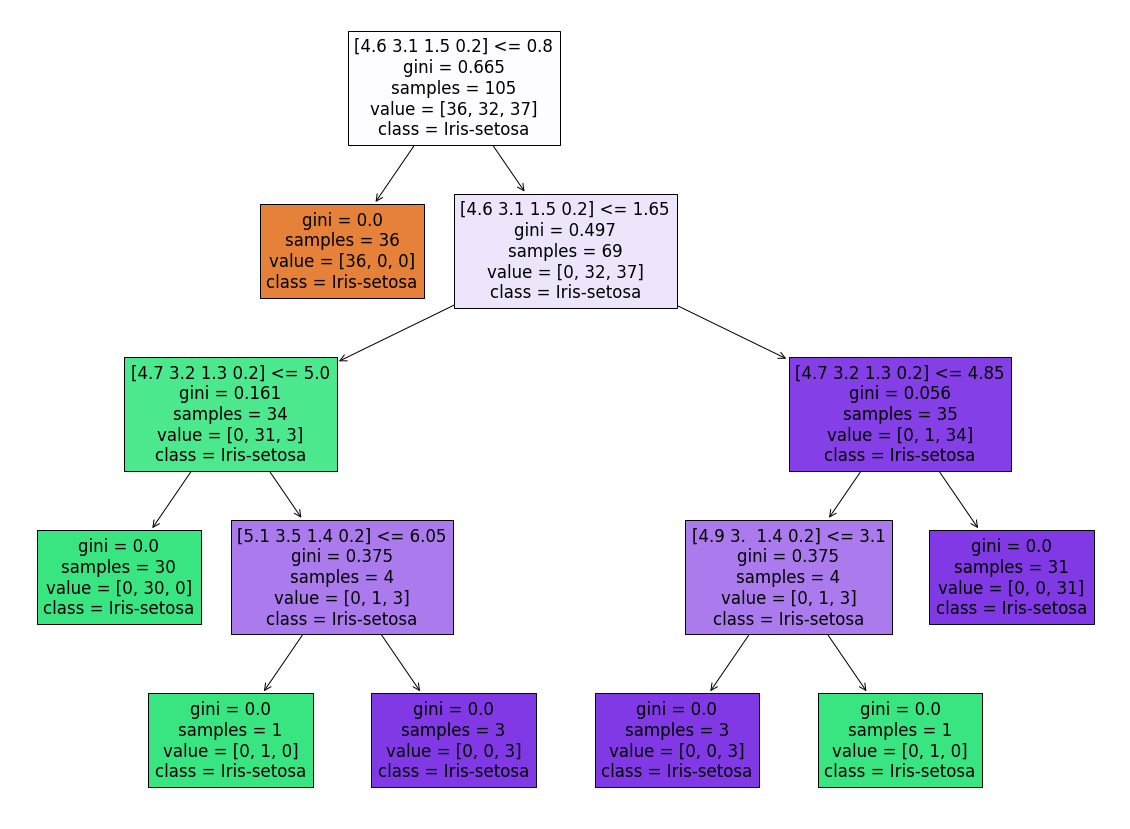

In [21]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(dtc, 
                   feature_names=X,  
                   class_names=Y,
                   filled=True)

Creation of a Decision Tree classifier and visualizing it graphically.

## **The End**